In [1]:
import rioxarray as rxr
import pandas as pd
import geopandas as gpd
import numpy as np  
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
from dask.diagnostics import ProgressBar

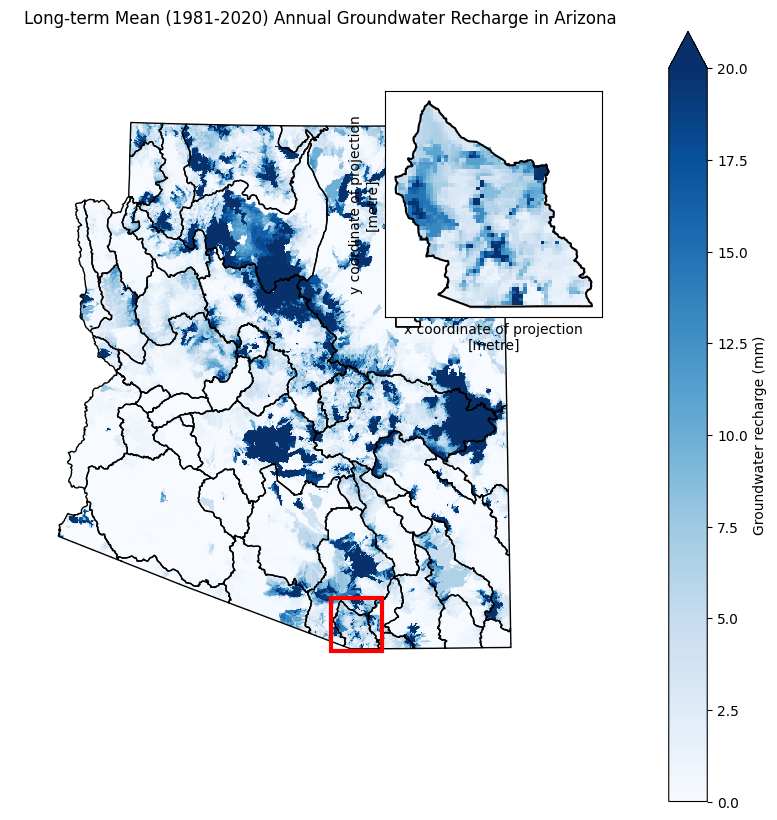

In [2]:
#Loading in the NWM mean annual recharge raster (Re_WY) and the ADWR groundwater basin shapfile (GW_basin)

Re_WY = rxr.open_rasterio("/workspaces/homework_marlanahinkley/homework_submissions/NWM_figures/Re/Re_M_WY.tif")
GW_basin = gpd.read_file("/workspaces/homework_marlanahinkley/homework_submissions/NWM_figures/Groundwater_Basin/Groundwater_Basin.shp")

#Creating a figure
fig, axes = plt.subplots(figsize=(10,10))

#Clipping the Re_WY raster to the GW basin shapefile (AZ Boundary)
Re_WY_clipped = Re_WY.rio.clip(GW_basin.geometry, GW_basin.crs, drop=False)

#Plotting the clipped Re_WY raster and the GW basin polygons
Re_WY_clipped.plot(ax=axes, cmap="Blues", vmin=0, vmax=20, cbar_kwargs={"label": "Groundwater recharge (mm)"})
GW_basin.plot(ax=axes, facecolor="none", edgecolor="black" , linewidth=1)
axes.axis('off')
plt.title("Long-term Mean (1981-2020) Annual Groundwater Recharge in Arizona")

# create inset axes and plot zoomed raster + feature
axins = inset_axes(axes, width="35%", height="35%", loc="upper right", borderpad=2)

#Highlighting the Santa Cruz AMA groundwater basin
feature = GW_basin.loc[GW_basin['BASIN_NAME'] == 'SANTA CRUZ AMA']

#Clipping the raster to the Santa Cruz AMA groundwater basin
Re_WY_basin_clip = Re_WY.rio.clip(feature.geometry, GW_basin.crs, drop=False)
Re_WY_basin_clip.plot(ax=axins, cmap="Blues", vmin=0, vmax=20, add_colorbar=False)
feature.plot(ax=axins, facecolor="none", edgecolor="black", linewidth=1.5)

# draw a red rectangle on the main map showing inset area
minx, miny, maxx, maxy = feature.total_bounds
pad = 0.05 * max(maxx - minx, maxy - miny)
rect = Rectangle((minx - pad, miny - pad),
                 (maxx - minx) + 2*pad,
                 (maxy - miny) + 2*pad,
                 edgecolor="red", facecolor="none", linewidth=3)
axes.add_patch(rect)
axins.set_xlim(minx - pad, maxx + pad)
axins.set_ylim(miny - pad, maxy + pad)
axins.set_xticks([])
axins.set_yticks([])
axins.set_title("")
axins.tick_params(labelleft=False, labelright=False, labeltop=False, labelbottom=False)
plt.savefig('Santa Cruz AMA.png')

In [3]:
def create_basin_Re_map(basin): #input the geodataframe of the basin to plot
    #Creating a figure
    fig, axes = plt.subplots(figsize=(10,10))

    #Clipping the Re_WY raster to the GW basin shapefile (AZ Boundary)
    Re_WY_clipped = Re_WY.rio.clip(GW_basin.geometry, GW_basin.crs, drop=False)

    #Plotting the clipped Re_WY raster and the GW basin polygons
    Re_WY_clipped.plot(ax=axes, cmap="Blues", vmin=0, vmax=20, cbar_kwargs={"label": "Groundwater recharge (mm)"})
    GW_basin.plot(ax=axes, facecolor="none", edgecolor="black" , linewidth=1)
    axes.axis('off')
    plt.title("Long-term Mean (1981-2020) Annual Groundwater Recharge in Arizona")
        
    # create inset axes and plot zoomed raster + feature
    axins = inset_axes(axes, width="35%", height="35%", loc="upper right", borderpad=2)

    #Highlighting the specified groundwater basin
    feature = basin
    #if feature.empty:
        # fallback: try alternative column names or choose first feature
        #feature = GW_basin.iloc[[0]]

    #Clipping the raster to the specified groundwater basin
    Re_WY_basin_clip = Re_WY.rio.clip(feature.geometry, GW_basin.crs, drop=False)
    Re_WY_basin_clip.plot(ax=axins, cmap="Blues", vmin=0, vmax=20, add_colorbar=False)
    feature.plot(ax=axins, facecolor="none", edgecolor="black", linewidth=1.5)

    # draw a red rectangle on the main map showing inset area
    minx, miny, maxx, maxy = feature.total_bounds
    pad = 0.05 * max(maxx - minx, maxy - miny)
    rect = Rectangle((minx - pad, miny - pad),
                     (maxx - minx) + 2*pad,
                     (maxy - miny) + 2*pad,
                     edgecolor="red", facecolor="none", linewidth=3)
    axes.add_patch(rect)
    
    axins.set_xlim(minx - pad, maxx + pad)
    axins.set_ylim(miny - pad, maxy + pad)
    axins.set_xticks([])
    axins.set_yticks([])
    axins.set_title("")
    axins.tick_params(labelleft=False, labelright=False, labeltop=False, labelbottom=False)
    basin_name = feature.loc[0, 'BASIN_NAME']
    plt.savefig(f"{basin_name}.png")

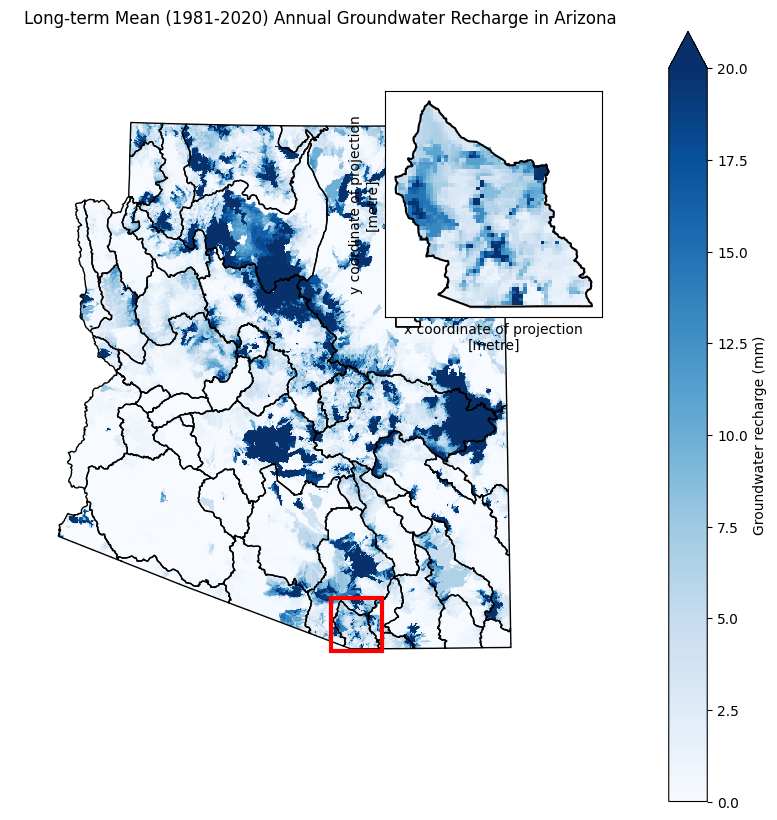

In [4]:
basin_gdf = GW_basin.loc[GW_basin['BASIN_NAME'] == 'SANTA CRUZ AMA']
create_basin_Re_map(basin_gdf)

KeyError: 0

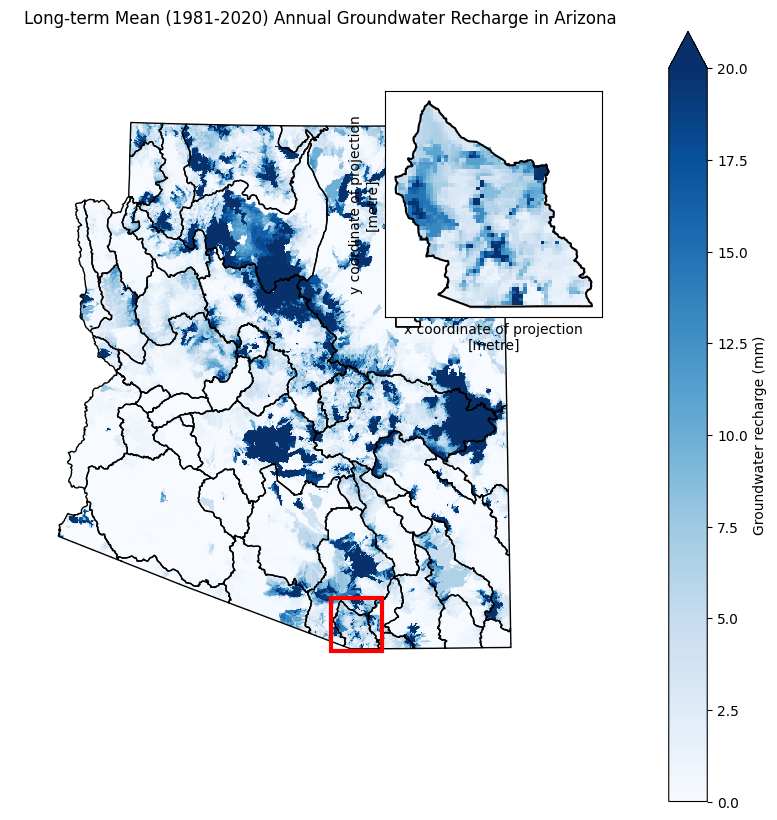

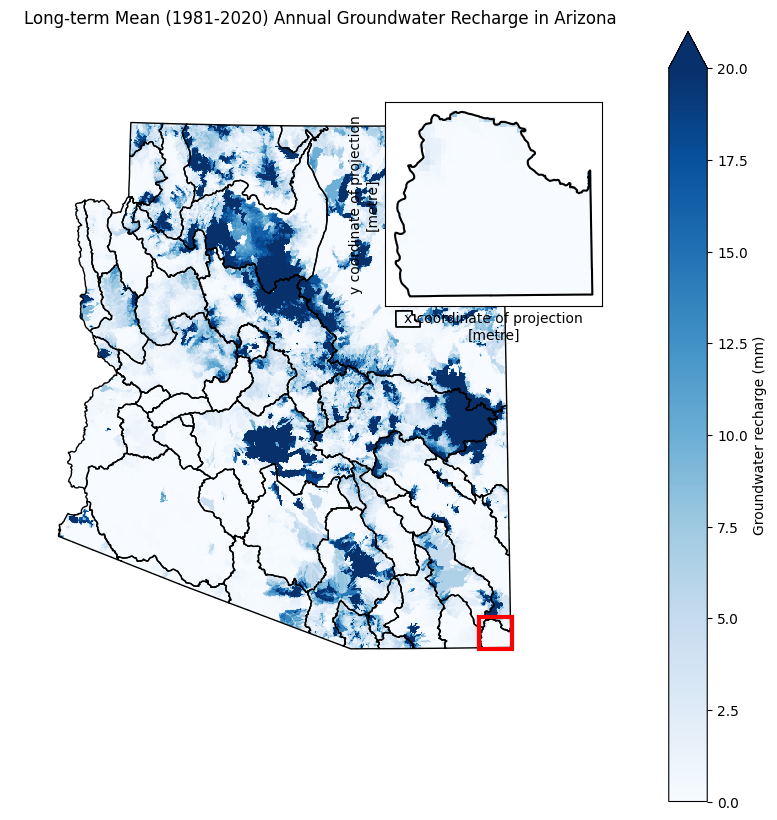

In [5]:
basin_names = GW_basin['BASIN_NAME'].unique()

for b in basin_names:
    basin_gdf = GW_basin[GW_basin['BASIN_NAME'] == b]
    create_basin_Re_map(basin_gdf)


In [36]:
basin_names

array(['SANTA CRUZ AMA', 'SAN BERNARDINO VALLEY', 'SAN RAFAEL',
       'TIGER WASH', 'VIRGIN RIVER', 'SHIVWITS PLATEAU', 'KANAB PLATEAU',
       'LITTLE COLORADO RIVER PLATEAU', 'PARIA', 'GRAND WASH',
       'COCONINO PLATEAU', 'HUALAPAI VALLEY INA', 'MEADVIEW',
       'DETRITAL VALLEY', 'LAKE MOHAVE', 'PEACH SPRINGS', 'VERDE RIVER',
       'BIG SANDY', 'SACRAMENTO VALLEY', 'JOSEPH CITY INA',
       'BILL WILLIAMS', 'PRESCOTT AMA', 'LAKE HAVASU', 'AGUA FRIA',
       'UPPER HASSAYAMPA', 'TONTO CREEK', 'SALT RIVER', 'PARKER',
       'BUTLER VALLEY', 'MCMULLEN VALLEY', 'PHOENIX AMA',
       'RANEGRAS PLAIN', 'MORENCI', 'HARQUAHALA INA', 'SAFFORD',
       'LOWER GILA', 'BONITA CREEK', 'LOWER SAN PEDRO', 'PINAL AMA',
       'DRIPPING SPRING WASH', 'GILA BEND', 'DONNELLY WASH',
       'DUNCAN VALLEY', 'ARAVAIPA CANYON', 'YUMA', 'TUCSON AMA',
       'WILLCOX AMA', 'SAN SIMON WASH', 'UPPER SAN PEDRO',
       'WESTERN MEXICAN DRAINAGE', 'CIENEGA CREEK', 'DOUGLAS AMA'],
      dtype=object)

In [48]:
basin_gdf

,OBJECTID,BASIN_NAME,NAME_ABBR,BASIN_NA_1,Shape__Are,Shape__Len,geometry
0,2,SANTA CRUZ AMA,SCA,SANTA CRUZ AMA,1.853991e+09,227784.354771,"POLYGON ((481155.982 3524735.269, 481185.919 3..."


In [4]:
GW_basin.head()

,OBJECTID,BASIN_NAME,NAME_ABBR,BASIN_NA_1,Shape__Are,Shape__Len,geometry
0,2,SANTA CRUZ AMA,SCA,SANTA CRUZ AMA,1.853991e+09,227784.354771,"POLYGON ((481155.982 3524735.269, 481185.919 3..."
1,3,SAN BERNARDINO VALLEY,SBV,SAN BERNADINO VALLEY BASIN,1.003345e+09,151085.594522,"POLYGON ((655800.905 3501799.2, 655817.405 350..."
2,4,SAN RAFAEL,SRF,SAN RAFAEL BASIN,5.924155e+08,128285.968816,"POLYGON ((540754.845 3485904.667, 540769.72 34..."
3,5,TIGER WASH,TIG,TIGER WASH BASIN,1.919046e+08,63215.292593,"POLYGON ((298757.482 3749840.931, 299671.513 3..."
4,6,VIRGIN RIVER,VRG,VIRGIN RIVER BASIN,1.122834e+09,172022.797035,"POLYGON ((262297.846 4067969.893, 262183.596 4..."


In [49]:
feature.total_bounds

array([ 471615.7149, 3466438.627 ,  527376.6767, 3524735.269 ])

In [50]:
GW_basin.iloc[0 ]

OBJECTID                                                      2
BASIN_NAME                                       SANTA CRUZ AMA
NAME_ABBR                                                   SCA
BASIN_NA_1                                       SANTA CRUZ AMA
Shape__Are                                    1853991191.767578
Shape__Len                                        227784.354771
geometry      POLYGON ((481155.9815 3524735.269, 481185.9192...
Name: 0, dtype: object

In [48]:
feature

,OBJECTID,BASIN_NAME,NAME_ABBR,BASIN_NA_1,Shape__Are,Shape__Len,geometry
0,2,SANTA CRUZ AMA,SCA,SANTA CRUZ AMA,1.853991e+09,227784.354771,"POLYGON ((481155.982 3524735.269, 481185.919 3..."
